In [63]:
import pandas as pd
import numpy as np
import seaborn as sb
import datetime
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression

%matplotlib inline

In [64]:
train_data = pd.read_csv("train.csv", sep=",")

In [65]:
train_data.head()

,id,idsito,idmodel,idbrand,lat,lon,ageinmonths,anno,day,ora,...,pcnm9,pcnm10,pcnm11,pcnm12,pcnm13,pcnm14,pcnm15,irr_pvgis_mod,irri_pvgis_mod,kwh
0,97595,0.425,0.083,0.083,0.437,0.631,1.000,2012,0.003,0.0,...,0.599,0.553,0.390,0.828,0.562,0.485,0.612,0.0,0.189,0.0
1,97606,0.250,0.208,0.083,0.437,0.620,0.063,2012,0.003,0.0,...,0.867,0.000,0.086,0.990,0.841,0.606,0.616,0.0,0.200,0.0
2,97637,0.350,0.375,0.000,0.439,0.626,0.000,2012,0.003,0.0,...,0.072,0.432,0.257,0.884,0.597,0.539,0.614,0.0,0.158,0.0
3,97646,0.325,0.292,0.167,0.440,0.612,0.250,2012,0.003,0.0,...,1.000,1.000,0.252,0.787,1.000,0.432,0.620,0.0,0.204,0.0
4,97772,0.000,0.000,0.333,0.436,0.626,0.719,2012,0.003,0.0,...,0.532,0.619,0.327,0.748,0.614,0.473,0.614,0.0,0.199,0.0


In [66]:
train_data.shape

(181603, 51)

In [67]:
train_data = train_data.dropna()

In [68]:
print(list(train_data.columns))

['id', 'idsito', 'idmodel', 'idbrand', 'lat', 'lon', 'ageinmonths', 'anno', 'day', 'ora', 'data', 'temperatura_ambiente', 'irradiamento', 'pressure', 'windspeed', 'humidity', 'icon', 'dewpoint', 'windbearing', 'cloudcover', 'tempi', 'irri', 'pressurei', 'windspeedi', 'humidityi', 'dewpointi', 'windbearingi', 'cloudcoveri', 'dist', 'altitude', 'azimuth', 'altitudei', 'azimuthi', 'pcnm1', 'pcnm2', 'pcnm3', 'pcnm4', 'pcnm5', 'pcnm6', 'pcnm7', 'pcnm8', 'pcnm9', 'pcnm10', 'pcnm11', 'pcnm12', 'pcnm13', 'pcnm14', 'pcnm15', 'irr_pvgis_mod', 'irri_pvgis_mod', 'kwh']


In [69]:
dependent_attribute = ["kwh"]

In [117]:
independent_attributes_1 = ["temperatura_ambiente", "irradiamento", "pressure", "windspeed", "humidity", "dewpoint", "windbearing", "cloudcover"]
independent_attributes_2 = ["tempi", "irri", "pressurei", "windspeedi", "humidityi", "dewpointi", "windbearingi", "cloudcoveri"]
independent_attributes_3 = ["irri_pvgis_mod", "irr_pvgis_mod", "dist", "icon"]
independent_attributes_4 = ["idsito", "idmodel", "idbrand"]
independent_attributes_5 = ['lat', 'lon', 'ageinmonths', 'day', 'ora']
independent_attributes_6 = ['altitude', 'azimuth', 'altitudei', 'azimuthi']

In [71]:
independent_df_1 = train_data.loc[:, independent_attributes_1]
independent_df_1.head(10)

,temperatura_ambiente,irradiamento,pressure,windspeed,humidity,dewpoint,windbearing,cloudcover
0,0.212,0.0,0.000,0.054,0.81,0.436,0.557,0.00
1,0.212,0.0,0.000,0.062,0.80,0.444,0.585,0.00
2,0.212,0.0,0.000,0.054,0.76,0.432,0.557,0.00
3,0.212,0.0,0.000,0.060,0.76,0.442,0.578,0.00
4,0.212,0.0,0.000,0.054,0.82,0.436,0.557,0.00
5,0.212,0.0,0.000,0.054,0.83,0.450,0.493,0.57
6,0.212,0.0,0.000,0.054,0.83,0.450,0.493,0.56
7,0.212,0.0,0.762,0.071,0.81,0.502,0.559,0.00
8,0.212,0.0,0.000,0.061,0.80,0.444,0.582,0.00
9,0.212,0.0,0.000,0.054,0.80,0.435,0.557,0.00


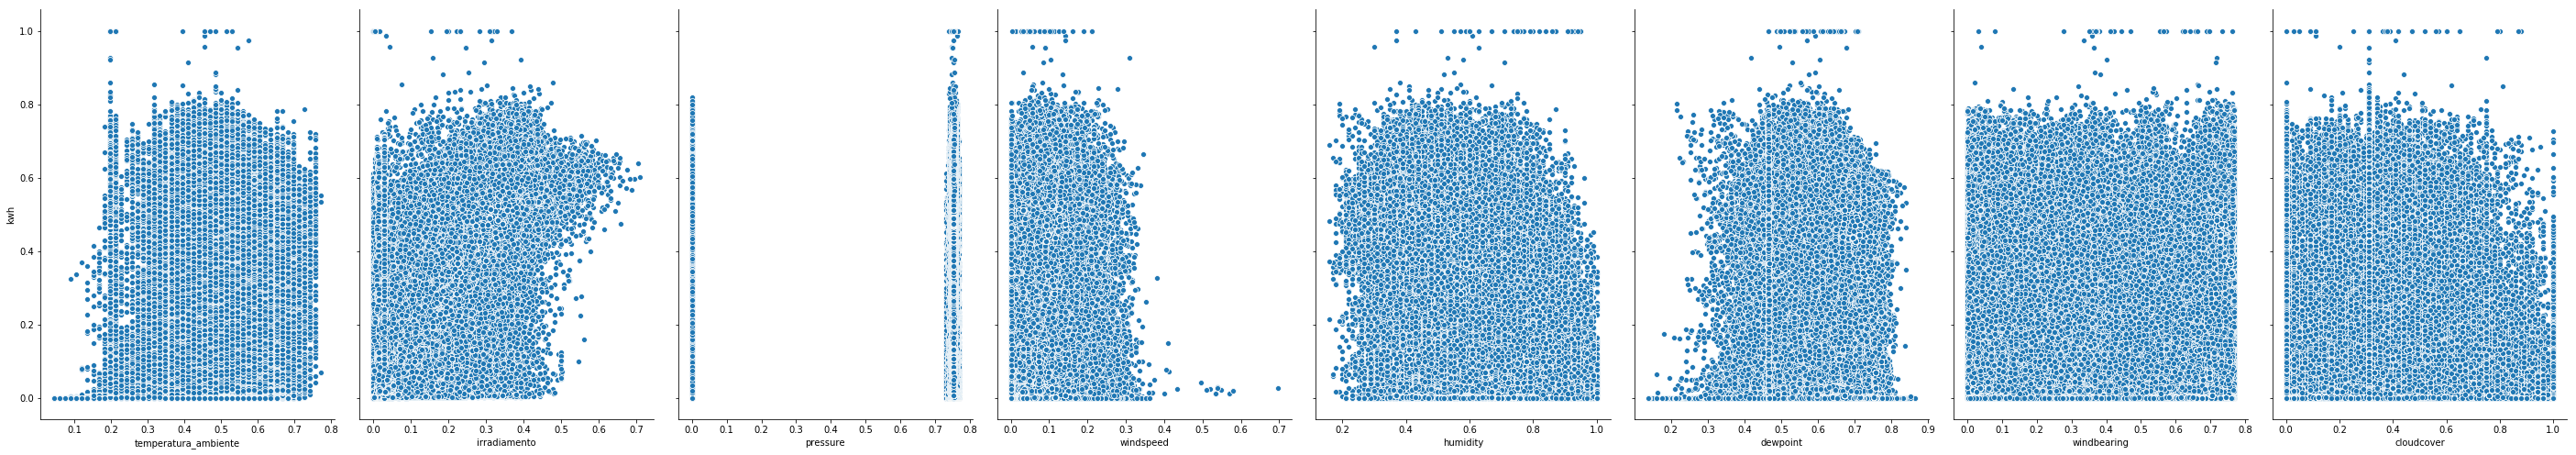

In [72]:
sb.pairplot(train_data, x_vars=independent_attributes_1, y_vars=dependent_attribute, height=7, aspect=0.7)

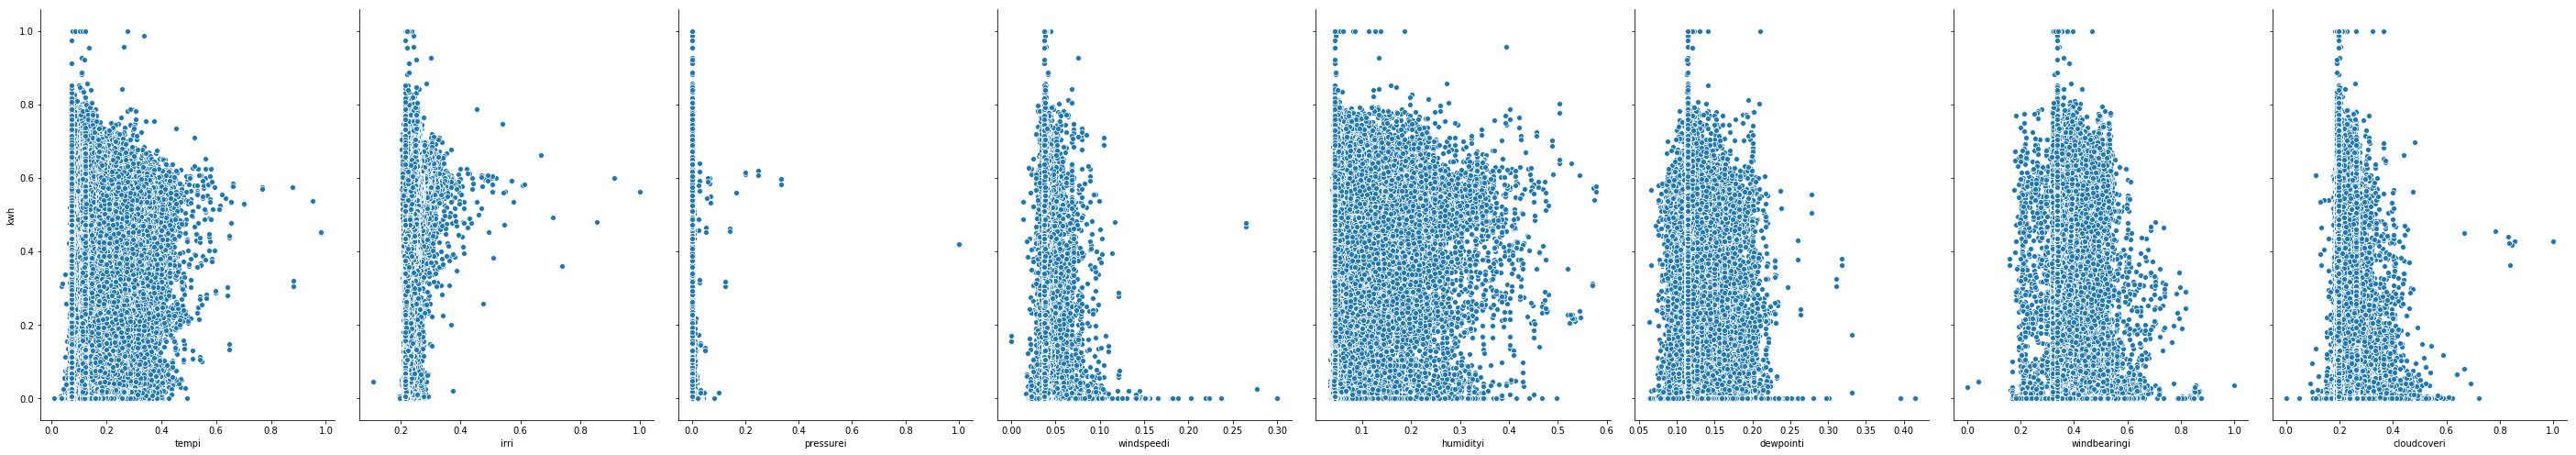

In [73]:
sb.pairplot(train_data, x_vars=independent_attributes_2, y_vars=dependent_attribute, height=7, aspect=0.7)

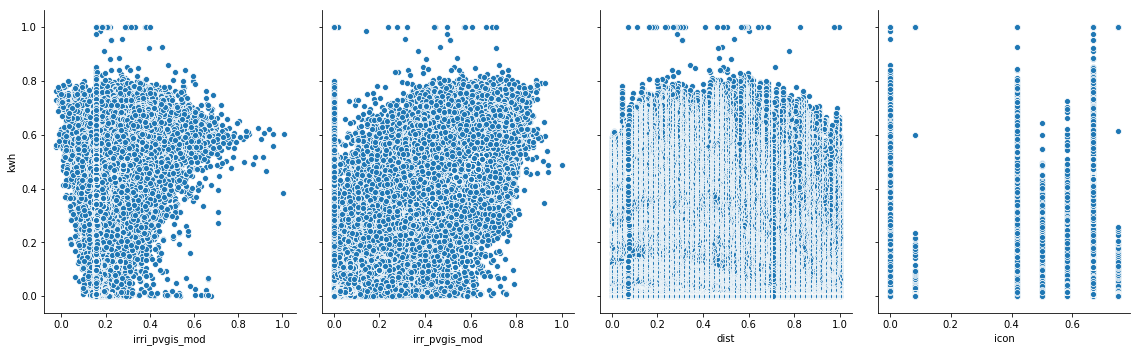

In [120]:
sb.pairplot(train_data, x_vars=independent_attributes_3, y_vars=dependent_attribute, height=5, aspect=0.8)

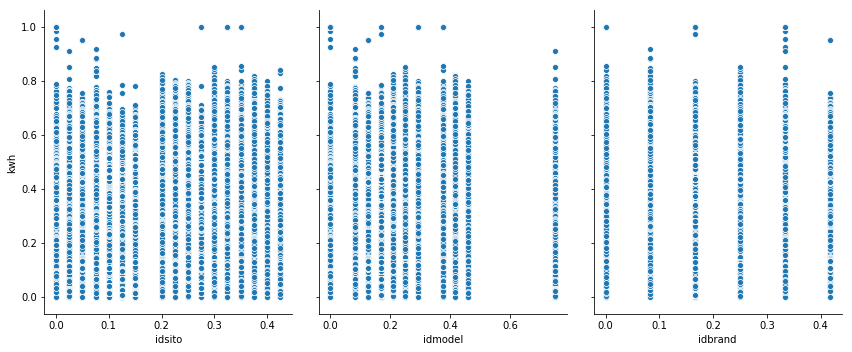

In [75]:
sb.pairplot(train_data, x_vars=independent_attributes_4, y_vars=dependent_attribute, height=5, aspect=0.8)

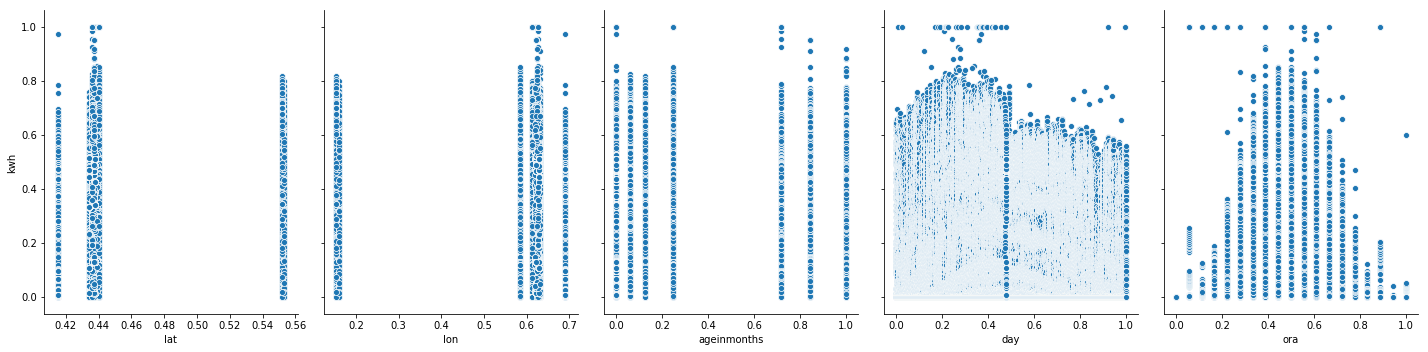

In [76]:
sb.pairplot(train_data, x_vars=independent_attributes_5, y_vars=dependent_attribute, height=5, aspect=0.8)

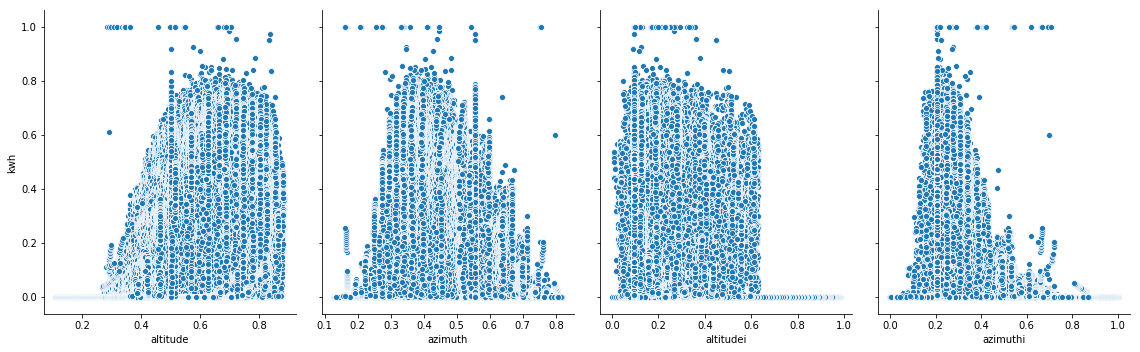

In [77]:
sb.pairplot(train_data, x_vars=independent_attributes_6, y_vars=dependent_attribute, height=5, aspect=0.8)

In [78]:
class Regression:
    def __init__(self, X_train, X_test, Y_train, Y_test, x_df=[], y_df=[], random_st=0):
        self.X_train = X_train
        self.X_test = X_test
        self.Y_train = Y_train
        self.Y_test = Y_test
        
        if (len(x_df) > 0 and len(y_df) > 0):
            self.X_train, self.X_test, self.Y_train, self.Y_test = train_test_split(x_df, y_df, random_state = random_st)
  

    def RandomForest(self, estimators):
        forest_reg = RandomForestRegressor(n_estimators = estimators)
        forest_reg.fit(self.X_train, self.Y_train.iloc[:, 0])
        forest_pred = forest_reg.predict(self.X_test)
        
        if (len(self.Y_test) > 0):
            forest_rmse = np.sqrt(metrics.mean_squared_error(self.Y_test, forest_pred))
            print("Random Forest RMSE: ", forest_rmse)
            
        return forest_pred
    
        
    def GradientBoostingRegressor(self, estimators):
        gradient_reg = GradientBoostingRegressor(n_estimators=estimators)
        gradient_reg.fit(self.X_train, self.Y_train.iloc[:, 0])
        gradient_pred = gradient_reg.predict(self.X_test)
        
        if (len(self.Y_test) > 0):
            gradient_rmse = np.sqrt(metrics.mean_squared_error(self.Y_test, gradient_pred))
            print("Gradient Boosting Regression RMSE: ", gradient_rmse)
            
        return gradient_pred
    
        
    def KNearestNeighbors(self, neighbors):
        knn_reg = KNeighborsRegressor(n_neighbors = neighbors)
        knn_reg.fit(self.X_train, self.Y_train.iloc[:, 0])
        knn_pred = knn_reg.predict(self.X_test)
        
        if (len(self.Y_test) > 0):
            knn_rmse = np.sqrt(metrics.mean_squared_error(self.Y_test, knn_pred))
            print("Nearest Neighbors RMSE: ", knn_rmse)
        
        return knn_pred
    
        
    def LinearRegression(self):
        linear_reg = LinearRegression()
        linear_reg.fit(self.X_train, self.Y_train.iloc[:, 0])
        linear_pred = linear_reg.predict(self.X_test)
        
        if (len(self.Y_test) > 0):
            linear_rmse = np.sqrt(metrics.mean_squared_error(self.Y_test, linear_pred))
            print("Linear Regression RMSE: ", linear_rmse)
            
        return linear_pred
    


In [79]:
X = train_data.loc[:, independent_attributes_2]
Y = train_data.loc[:, dependent_attribute]

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=0)

In [80]:
X_train.head()

,tempi,irri,pressurei,windspeedi,humidityi,dewpointi,windbearingi,cloudcoveri
68529,0.119,0.217,0.0,0.040,0.056,0.114,0.353,0.230
122271,0.072,0.216,0.0,0.037,0.044,0.114,0.336,0.196
18407,0.072,0.216,0.0,0.037,0.044,0.114,0.336,0.196
153137,0.072,0.216,0.0,0.037,0.044,0.114,0.336,0.196
36369,0.233,0.228,0.0,0.039,0.042,0.174,0.336,0.191


In [81]:
Y_train.head()

,kwh
68529,0.068
122271,0.135
18407,0.000
153137,0.007
36369,0.082


In [82]:
Y = train_data.loc[:, dependent_attribute]

In [83]:
reg_attr_1 = Regression(None, None, None, None, train_data.loc[:, independent_attributes_1], Y, 0)

reg_attr_1.RandomForest(100)
reg_attr_1.GradientBoostingRegressor(100)
reg_attr_1.KNearestNeighbors(10)

Random Forest RMSE:  0.07167631720567479
Gradient Boosting Regression RMSE:  0.0874194796127936
Nearest Neighbors RMSE:  0.078376240073376


array([2.700e-02, 3.660e-01, 1.000e-04, ..., 2.395e-01, 5.089e-01,
       2.990e-02])

In [84]:
reg_attr_2 = Regression(None, None, None, None, train_data.loc[:, independent_attributes_2], Y, 0)

reg_attr_2.RandomForest(100)
reg_attr_2.GradientBoostingRegressor(100)
reg_attr_2.KNearestNeighbors(10)

Random Forest RMSE:  0.13207939133728408
Gradient Boosting Regression RMSE:  0.14270876768947
Nearest Neighbors RMSE:  0.15191362416757326


array([0.0349, 0.366 , 0.0183, ..., 0.2102, 0.3497, 0.0948])

In [85]:
reg_attr_irr = Regression(None, None, None, None, train_data.loc[:, ["irr_pvgis_mod"]], Y, 0)
reg_attr_irr.LinearRegression()

Linear Regression RMSE:  0.11168543697419299


array([0.02481407, 0.36536842, 0.02481407, ..., 0.20538707, 0.30913736,
       0.02481407])

In [86]:
reg_attr_6 = Regression(None, None, None, None, train_data.loc[:, independent_attributes_6], Y, 0)

reg_attr_6.RandomForest(100)
reg_attr_6.GradientBoostingRegressor(100)
reg_attr_6.KNearestNeighbors(10)

Random Forest RMSE:  0.0815314916575648
Gradient Boosting Regression RMSE:  0.10846171059873397
Nearest Neighbors RMSE:  0.08654673354360964


array([0.0174, 0.3914, 0.    , ..., 0.3526, 0.3305, 0.1994])

In [87]:
independent_attributes_all = ["temperatura_ambiente", "irradiamento", "pressure", "windspeed", "humidity", "dewpoint", "windbearing", "cloudcover", "irr_pvgis_mod", "altitude", "azimuth"]
reg_attr_all = Regression(None, None, None, None, train_data.loc[:, independent_attributes_all], Y, 1)

reg_attr_all.RandomForest(300)
reg_attr_all.GradientBoostingRegressor(300)
reg_attr_all.KNearestNeighbors(8)

Random Forest RMSE:  0.05998596541614461
Gradient Boosting Regression RMSE:  0.072006113792748
Nearest Neighbors RMSE:  0.06524092696830636


array([0.17875, 0.01975, 0.     , ..., 0.     , 0.211  , 0.     ])

In [101]:
independent_attributes_all = ["temperatura_ambiente", "irradiamento", "pressure", "windspeed", "humidity", "dewpoint", "windbearing", "cloudcover", "irr_pvgis_mod", "altitude", "azimuth", "day"]
reg_attr_all = Regression(None, None, None, None, train_data.loc[:, independent_attributes_all], Y, 1)

reg_attr_all.RandomForest(500)
#reg_attr_all.GradientBoostingRegressor(300)
#reg_attr_all.KNearestNeighbors(8)

Random Forest RMSE:  0.05766846779421909


array([1.83576000e-01, 1.11308845e-02, 1.74721309e-06, ...,
       1.77424624e-05, 2.22508000e-01, 1.74721309e-06])

In [102]:
independent_attributes_all = ["temperatura_ambiente", "irradiamento", "pressure", "windspeed", "humidity", "dewpoint", "windbearing", "cloudcover", "irr_pvgis_mod", "altitude", "azimuth", "day", "idsito"]
reg_attr_all = Regression(None, None, None, None, train_data.loc[:, independent_attributes_all], Y, 1)

reg_attr_all.RandomForest(400)

Random Forest RMSE:  0.05338370709142121


array([1.98195000e-01, 1.46788576e-04, 9.16646751e-06, ...,
       5.26172625e-06, 1.81815000e-01, 6.11723800e-06])

In [124]:
independent_attributes_all = ["temperatura_ambiente", "irradiamento", "pressure", "windspeed", "humidity", "dewpoint", "windbearing", "cloudcover", "irr_pvgis_mod", "altitude", "azimuth", "day", "idsito", "ora", "dist"]
reg_attr_all = Regression(None, None, None, None, train_data.loc[:, independent_attributes_all], Y, 1)

reg_attr_all.RandomForest(350)

Random Forest RMSE:  0.052895733428380415


array([1.96488571e-01, 5.95156489e-04, 9.04747807e-06, ...,
       5.02868166e-06, 2.52445714e-01, 6.31459332e-06])

In [126]:
independent_attributes_all = ["temperatura_ambiente", "irradiamento", "pressure", "windspeed", "humidity", "dewpoint", "windbearing", "cloudcover", "irr_pvgis_mod", "altitude", "azimuth", "day", "idsito", "ora", "dist"]
reg_attr_all = Regression(None, None, None, None, train_data.loc[:, independent_attributes_all], Y, 1)

reg_attr_all.RandomForest(380)

Random Forest RMSE:  0.05279063946367534


array([1.95386842e-01, 6.09413187e-04, 9.49813097e-06, ...,
       5.05505001e-06, 2.47121053e-01, 6.53965785e-06])

In [138]:
independent_attributes_all_test = ["temperatura_ambiente", "irradiamento", "pressure", "windspeed", "humidity", "dewpoint", "windbearing", "cloudcover", "irr_pvgis_mod", "altitude", "azimuth", "day", "idsito", "ora", "dist"]

test_data = pd.read_csv("test.csv", sep=",")

In [139]:
test_data.head()

,id,idsito,idmodel,idbrand,lat,lon,ageinmonths,anno,day,ora,...,pcnm8,pcnm9,pcnm10,pcnm11,pcnm12,pcnm13,pcnm14,pcnm15,irr_pvgis_mod,irri_pvgis_mod
0,75823,0.150,0.167,0.167,0.438,0.630,0.0,2013,0.477,0.556,...,0.204,0.755,0.812,0.424,1.000,0.137,0.405,0.613,0.648,0.158
1,75825,0.275,0.167,0.167,0.437,0.622,0.0,2013,0.477,0.556,...,0.511,0.527,0.543,1.000,0.972,0.738,0.644,0.615,0.587,0.281
2,75858,0.275,0.167,0.167,0.437,0.622,0.0,2013,0.477,0.556,...,0.511,0.527,0.543,1.000,0.972,0.738,0.644,0.615,0.587,0.281
3,75860,0.275,0.167,0.167,0.437,0.622,0.0,2013,0.477,0.556,...,0.511,0.527,0.543,1.000,0.972,0.738,0.644,0.615,0.587,0.281
4,75906,0.150,0.167,0.167,0.438,0.630,0.0,2013,0.477,0.556,...,0.204,0.755,0.812,0.424,1.000,0.137,0.405,0.613,0.648,0.158


In [140]:
test_data.shape

(54187, 50)

In [141]:
test_data = test_data.dropna()

In [142]:
X_train = train_data.loc[:, independent_attributes_all_test]
Y_train = train_data.loc[:, dependent_attribute]
X_test = test_data.loc[:, independent_attributes_all_test]
Y_test = []

In [143]:
reg_ = Regression(X_train, X_test, Y_train, Y_test)

In [144]:
forest_pred = reg_.RandomForest(100)

In [145]:
df_pred = pd.DataFrame(forest_pred, columns=["Predicted"])
df_pred.insert(0, "Id", 0)

In [146]:
i = 0
for row in range(len(df_pred)):
    df_pred.loc[i, ["Id"]] = test_data.loc[i, "id"]
    i += 1

In [147]:
df_pred.tail()

,Id,Predicted
54182,25611,0.000004
54183,29547,0.000089
54184,30799,0.010002
54185,33064,0.002032
54186,147846,0.000004


In [148]:
now = datetime.datetime.now()
fileName = "Submission_" + str(now.date()) + "__" + str(now.time().isoformat(timespec='minutes')).replace(":", "_") + ".csv"
df_pred.to_csv(fileName, sep=',', encoding='utf-8', index=False)